In [ ]:
import kagglehub
alincijov_self_driving_cars_path = kagglehub.dataset_download('alincijov/self-driving-cars')

print('Data source import complete.')

Data source import complete.


# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#9c7606; font-size:140%; text-align:left;padding: 10px; border-bottom: 2px solid #f79a05"> Import Libraries</p>

In [ ]:
import numpy as np
import pandas as pd
import cv2

from sklearn.utils import shuffle
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

import warnings

warnings.simplefilter('ignore')

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#9c7606; font-size:140%; text-align:left;padding: 10px; border-bottom: 2px solid #f79a05"> Load data</p>

In [ ]:
df = pd.read_csv('/content/train.csv')
df = shuffle(df)
df.head()

,Id,PredictionString
4032,555468afacb135988cd6c57112f08a61b759f0c15729a5...,1640.9712456169927 1331.7211892847918 -19.9897...
19896,6f7d3097df04cdb595740561412201a4f4578e07e4a6d8...,1860.6549565285145 1209.7420942266058 -18.7927...
3981,ff8599639a3449939b8707616d3d3ae7c3964cef4f4e5a...,1085.733169863207 1641.9707568306274 -23.62445...
4497,e0881b7906280a0af9f2a82b54e065c0d1a27c43099d22...,1000.8450754601737 1703.6280074736678 -23.6063...
2135,270d31d319d0eb21f65e1c9087770122ba01037911d711...,1614.588330740315 1329.8419273162167 -20.73342...


In [ ]:
labels = { 1:'car', 2:'truck', 3:'person', 4:'bicycle', 5:'traffic light'}

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

class BoundBox:
    def _init_(self, xmin, ymin, xmax, ymax, classes):
        self.xmin, self.ymin, self.xmax, self.ymax = xmin, ymin, xmax, ymax
        self.classes = classes  # List of probabilities for object types
        self.label = np.argmax(classes)  # Find the class with the highest probability

def draw_boxes(image_path, boxes, labels):
    label_colors = {
        "car": "black",
        "truck": "yellow",
        "traffic_light": "purple",
        "pedestrian": "blue",
        "bike": "green"
    }

    img = plt.imread(image_path)  # Load the image
    plt.imshow(img)
    ax = plt.gca()

    for box, label in zip(boxes, labels):
        rect = Rectangle((box.xmin, box.ymin), box.xmax - box.xmin, box.ymax - box.ymin,
                         linewidth=2, edgecolor=label_colors.get(label, "red"), facecolor='none')
        ax.add_patch(rect)
        plt.text(box.xmin, box.ymin, label, color=label_colors.get(label, "red"), fontsize=10)

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#9c7606; font-size:140%; text-align:left;padding: 10px; border-bottom: 2px solid #f79a05"> Model</p>

In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO
import PIL
from PIL import Image
from IPython.display import display
import os
import pathlib

In [ ]:
model = YOLO("yolov8m.pt")

In [ ]:
results = model.predict('/content/host-a004_cam0_1232815264051064006.jpeg',
                         save=True, conf=0.2, iou=0.5)



image 1/1 /content/host-a004_cam0_1232815264051064006.jpeg: 544x640 7 cars, 1 truck, 6 traffic lights, 1304.3ms
Speed: 5.1ms preprocess, 1304.3ms inference, 1.7ms postprocess per image at shape (1, 3, 544, 640)
Results saved to runs/detect/predict4


In [ ]:
result = results[0]

# finding the detailed result(Class, Coordinates, Prob)

for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

Object type: car
Coordinates: [1, 574, 253, 846]
Probability: 0.94
---
Object type: truck
Coordinates: [407, 480, 521, 587]
Probability: 0.9
---
Object type: traffic light
Coordinates: [1049, 368, 1092, 452]
Probability: 0.79
---
Object type: car
Coordinates: [4, 830, 1213, 1011]
Probability: 0.75
---
Object type: traffic light
Coordinates: [1188, 400, 1217, 465]
Probability: 0.75
---
Object type: traffic light
Coordinates: [1025, 380, 1048, 455]
Probability: 0.74
---
Object type: traffic light
Coordinates: [411, 418, 424, 445]
Probability: 0.72
---
Object type: traffic light
Coordinates: [589, 430, 602, 456]
Probability: 0.67
---
Object type: car
Coordinates: [0, 542, 66, 576]
Probability: 0.62
---
Object type: car
Coordinates: [272, 549, 320, 574]
Probability: 0.6
---
Object type: car
Coordinates: [1195, 688, 1223, 777]
Probability: 0.58
---
Object type: car
Coordinates: [639, 541, 657, 555]
Probability: 0.43
---
Object type: traffic light
Coordinates: [785, 487, 798, 519]
Probabilit

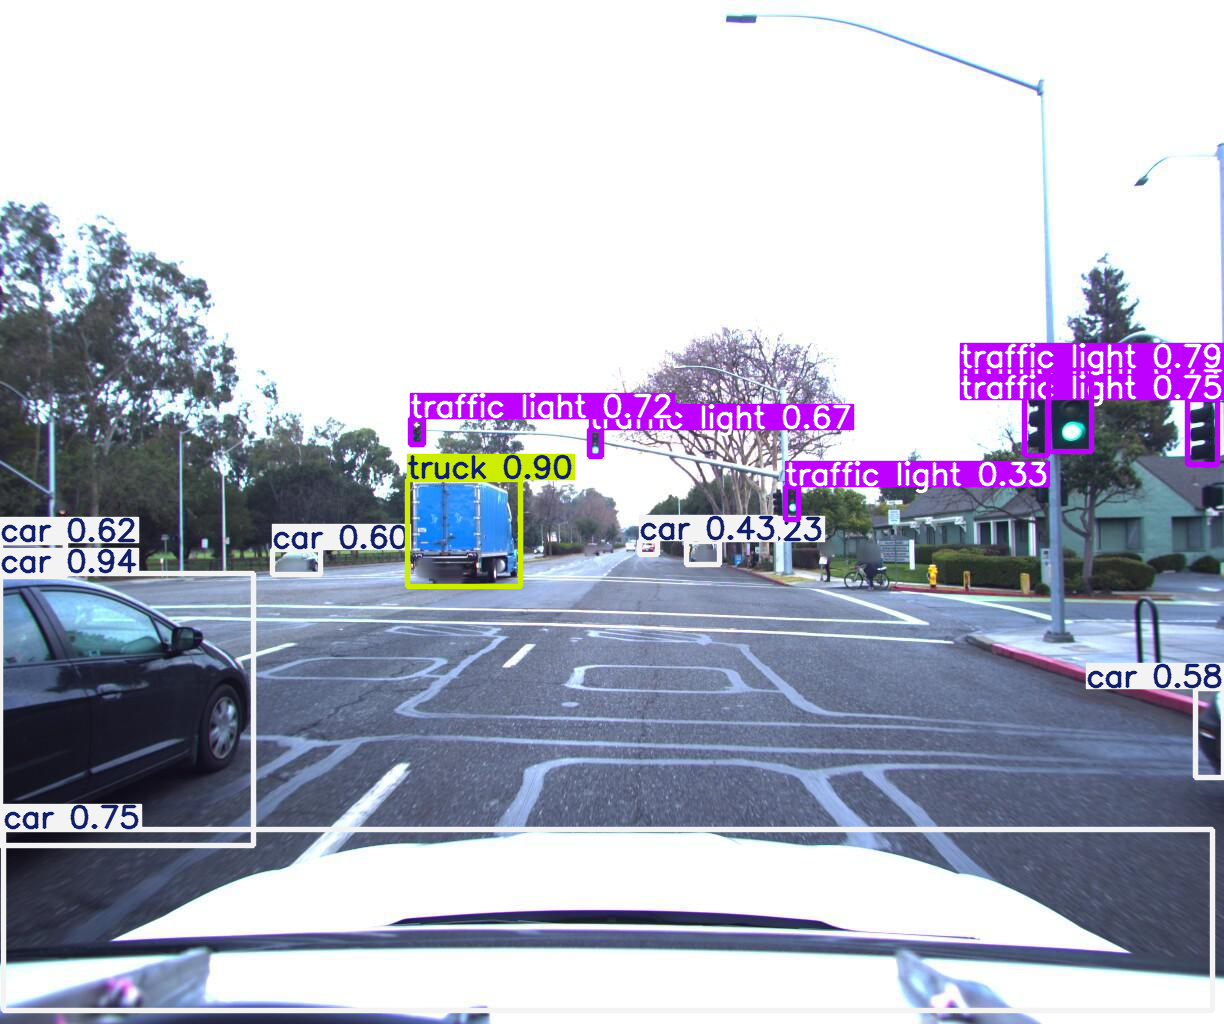

In [ ]:
# Plotting results
plot = results[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))